In [3]:
%matplotlib inline
import numpy as np

# Lab-2: GEOMETRY & NEAREST NEIGHBORS 
- Breakdown weightage for each part of the question is given.
- You can access class notes and library documentations.

## 1. Euclidean Norm (10 + 10 + 20 + 10 + 10) 
The first task for today will be to write functions to compute distances in different orders of complexity.

In [4]:
np.random.seed(2)
x_a, x_b = (np.random.rand(i, 2) for i in (2, 3))
x_c, x_d = (np.random.rand(i, 100) for i in (125, 150))

In [5]:
x_a, x_b

(array([[0.4359949 , 0.02592623],
        [0.54966248, 0.43532239]]),
 array([[0.4203678 , 0.33033482],
        [0.20464863, 0.61927097],
        [0.29965467, 0.26682728]]))

In [6]:
x_a.ndim, x_a.shape, x_a.shape[0]

(2, (2, 2), 2)

In [7]:
for val in x_a:
    print(val)

[0.4359949  0.02592623]
[0.54966248 0.43532239]


In [8]:
for val in x_b:
    print(val)

[0.4203678  0.33033482]
[0.20464863 0.61927097]
[0.29965467 0.26682728]


### a.

### 3 For loops for traversing the x matrix, y matrix and then the rows of these matrices, since their dimensions are same. Then saved the square of the differences of the dimensions in a temporary array and then stored these arrays in the final result dist

In [9]:
def pairwise_1(x, y):
    """
    Find pairwise euclidean distance using three for loops
    """
    # x is 2*2
    # y is 3*2
    dist = np.empty((x.shape[0], y.shape[0]))
    i = 0
    
    for val1 in x:
        temp = []
        for val2 in y:
            distance = 0
            for k in range(val1.shape[0]):
                dim1 = val1[k]
                dim2 = val2[k]
                distance = distance + (dim1 - dim2) ** 2
            temp.append(distance ** (1/2))
        dist[i] = temp
        i = i + 1
    
    return dist
             
#raise NotImplementedError

In [10]:
pairwise_1(x_a, x_b) #checking my function's output

array([[0.30480944, 0.6368509 , 0.27680674],
       [0.1665518 , 0.39098802, 0.30148716]])

In [11]:
pairwise_1(x_a, x_b)

array([[0.30480944, 0.6368509 , 0.27680674],
       [0.1665518 , 0.39098802, 0.30148716]])

### b.

In [12]:
for val in x_a:
    print(val)

[0.4359949  0.02592623]
[0.54966248 0.43532239]


In [13]:
for val in x_b:
    print(val)

[0.4203678  0.33033482]
[0.20464863 0.61927097]
[0.29965467 0.26682728]


In [14]:
def pairwise_2(x, y):
    """
    Find pairwise euclidean distance using two for loops
    """
    dist = np.empty((x.shape[0], y.shape[0]))
    i = 0
    for val1 in x:
        j = 0
        for val2 in  y:
            temp = []
            dist[i][j] = np.sum((val1 - val2) ** 2) ** (1/2)
            #print(dist[i][j])
            j = j + 1
        i = i + 1
    return dist
    #raise NotImplementedError

In [15]:
pairwise_2(x_a, x_b) #checking my function's output

array([[0.30480944, 0.6368509 , 0.27680674],
       [0.1665518 , 0.39098802, 0.30148716]])

In [16]:
pairwise_2(x_a, x_b)

array([[0.30480944, 0.6368509 , 0.27680674],
       [0.1665518 , 0.39098802, 0.30148716]])

### c.

In [17]:
def pairwise_3(x, y):
    """
    An optimize solution with no for loops
  
    """
    dist_mat = np.sum((x[:, None] - y) ** 2, axis = -1) ** (1/2)
    return dist_mat
    
    #raise NotImplementedError

In [18]:
pairwise_3(x_a, x_b) #checking my function's output

array([[0.30480944, 0.6368509 , 0.27680674],
       [0.1665518 , 0.39098802, 0.30148716]])

In [19]:
pairwise_3(x_a, x_b)

array([[0.30480944, 0.6368509 , 0.27680674],
       [0.1665518 , 0.39098802, 0.30148716]])

### d.

In [20]:
# Compute distance using euclidean distance from scipy library(you can only refer the scipy documentation)
from scipy.spatial import distance_matrix 
def scipy_version(x, y):
    """
    A solution using scipy
    """
    dist = distance_matrix(x, y, p=2)
    return dist
    #raise NotImplementedError

In [21]:
scipy_version(x_a, x_b)

array([[0.30480944, 0.6368509 , 0.27680674],
       [0.1665518 , 0.39098802, 0.30148716]])

### e.

In [22]:
# Now compare all 4 method's runtime using inbuilt timeit function for 7 runs.
methods = [
    pairwise_1,
    pairwise_2,
    pairwise_3,
    scipy_version,
]
#TODO: Compute the run time(r) of all methods above
import timeit
%timeit -n100 -r7 pairwise_1(x_a, x_b)
%timeit -n100 -r7 pairwise_2(x_a, x_b)
%timeit -n100 -r7 pairwise_3(x_a, x_b)
%timeit -n100 -r7 scipy_version(x_a, x_b)

28 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
69.2 µs ± 4.76 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.9 µs ± 323 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.2 µs ± 397 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
# Now compare all 4 method's runtime using inbuilt timeit function for 7 runs.
methods = [
    pairwise_1,
    pairwise_2,
    pairwise_3,
    scipy_version,
]
#TODO: Compute the run time(r) of all methods above

In [24]:
#print best values of time(in s) for all methods, out of the 7 runs.
setup = '''import numpy as np 
from __main__ import pairwise_1, x_a, x_b, pairwise_2, pairwise_3, scipy_version
'''
print(min(timeit.Timer("pairwise_1(x_a, x_b)", setup=setup).repeat(7, 100)))
print(min(timeit.Timer("pairwise_2(x_a, x_b)", setup=setup).repeat(7, 100)))
print(min(timeit.Timer("pairwise_3(x_a, x_b)", setup=setup).repeat(7, 100)))
print(min(timeit.Timer("scipy_version(x_a, x_b)", setup=setup).repeat(7, 100)))


0.0026518970000211084
0.006520372000011321
0.0012571679999950902
0.0021040139999968233


## 2. KNN (10 + 20 + 10)
Next we are going to implement KNN algorithm from scratch

### a.

### The function below is storing the distances and the labels in the dictionary. Then the distances are sorted and the sorted labels are returned

In [25]:
# sort elements of matrix and corresponding labels in ascending order.
def get_sorted_train_labels(distance_matrix, labels):
    sorted_labels = np.empty(distance_matrix.shape)
    #print(sorted_labels.shape[0], sorted_labels.shape[1])
    j = 0
    
    for row in range(distance_matrix.shape[0]):
        dict = {}
        for i in range(distance_matrix.shape[1]):
            dict[distance_matrix[row][i]] = y_train[i]
            
        dist_list = list(dict.keys())
        dist_list.sort()
        for ele in range(len(dist_list)):
            sorted_labels[j][ele] = int(dict[dist_list[ele]])    
        j = j + 1

        
    return sorted_labels
        
    #raise NotImplementedError

In [26]:
# test cases
x_test = np.array([[1,2,3] , [-4,5,-6]])
x_train = np.array([[0,0,0], [1,2,3], [4,5,6], [-4, 4, -6]]) 
y_train = np.array([[1, 1, 2, 3]]).T  #labels

In [27]:
# Here, we are comparing the distance computed by different methods if they are similar or not.
np.isclose(pairwise_1(x_test, x_train), pairwise_2(x_test, x_train)) 

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [28]:
np.isclose(pairwise_2(x_test, x_train), pairwise_3(x_test, x_train))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [29]:
distance_matrix = pairwise_3(x_test, x_train)

In [30]:
print(distance_matrix)

[[ 3.74165739  0.          5.19615242 10.48808848]
 [ 8.77496439 10.72380529 14.4222051   1.        ]]


In [31]:
np.shape(distance_matrix)

(2, 4)

In [32]:
sorted_labels = get_sorted_train_labels(distance_matrix, y_train)
sorted_labels

/tmp/ipykernel_36/2589960791.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sorted_labels[j][ele] = int(dict[dist_list[ele]])


array([[1., 1., 2., 3.],
       [3., 1., 1., 2.]])

In [33]:
# sorting distance computations and their corresponding labels.
sorted_train_labels = get_sorted_train_labels(distance_matrix, y_train)

/tmp/ipykernel_36/2589960791.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sorted_labels[j][ele] = int(dict[dist_list[ele]])


In [34]:
print(sorted_train_labels)

[[1. 1. 2. 3.]
 [3. 1. 1. 2.]]


In [35]:
print("Closest 3 classes for first element from set X: {}".format(sorted_train_labels[0, :3]))

Closest 3 classes for first element from set X: [1. 1. 2.]


In [36]:
print("Closest 3 classes for first element from set X: {}".format(sorted_train_labels[0, :3]))

Closest 3 classes for first element from set X: [1. 1. 2.]


### b.

### The function below is traversing through the labels matrix and for each test data point, it is storing the occurences of the top k labels in the dictionary. Then the label with maximum number of occurences is stored as the final label. If 2 labels have equal number of occurences then the label with smaller numerical value is stored in final

In [37]:
# First arrange the label sequence and then find the mode of k labels.
def get_mode_of_labels(labels, k):
    """
    Compute the mode of k labels
    """
    
    #print(labels)
    final_labels = []
    for row in labels:
        dict = {}
        #print(row)
        for j in row:
            #print(j)
            dict[j] = 0
            
        #print(len(row))
        for i in range(len(row)):
            if (i == (k - 1)):
                #print(i)
                break
            else:
                dict[row[i]] = dict[row[i]] + 1
                #print(dict[row[i]])

        maxm = 0
        label = 0   
        #print(dict)
        for key in dict.keys():
            if(dict[key] > maxm):
                label = key
                maxm = dict[key]
            elif(dict[key] == maxm):
                if(label > key or label == 0):
                    label = key
                
        #print(label)
        final_labels.append(int(label))
        #print(final_labels)

    #print(final_labels)
    return final_labels
    
   # raise NotImplementedError

### c.

In [38]:
# Now, using the functions created above, build a KNN.
def predict(x_test, x_train, y_train, k, distance_function):

    final_labels = []
    
    dist_mat = pairwise_3(x_test, x_train)
    get_sorted_labels = get_sorted_train_labels(dist_mat, y_train)
    final_labels = get_mode_of_labels(get_sorted_labels, k)
    return final_labels
   # raise NotImplementedError

In [39]:
prediction = predict(x_test, x_train, y_train, 3, pairwise_3)

/tmp/ipykernel_36/2589960791.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sorted_labels[j][ele] = int(dict[dist_list[ele]])


In [40]:
print(prediction)

[1, 1]


In [41]:
print(prediction)

[1, 1]


# Lab 3 - KNN

In [42]:
import pandas as pd

## Question 1

## Loading the data and the labels 

In [64]:
data = np.loadtxt("/kaggle/input/knn-data/data.csv", delimiter = ",", dtype = float)
labels = np.loadtxt("/kaggle/input/knn-data/labels.csv", delimiter = ",", dtype = float)

In [65]:
data

array([[  0. ,   1. ,   2. ,   3. ],
       [670. ,   3.1,   4.4,  71.4],
       [510. ,   3.8,   1.6,  10.2],
       [570. ,   2.8,   4.1,  66.3],
       [580. ,   2.7,   5.1,  96.9],
       [460. ,   3.2,   1.4,  10.2],
       [670. ,   3.1,   4.7,  76.5],
       [470. ,   3.2,   1.3,  10.2],
       [480. ,   3. ,   1.4,  15.3],
       [600. ,   2.7,   5.1,  81.6],
       [620. ,   2.9,   4.3,  66.3],
       [510. ,   3.3,   1.7,  25.5],
       [620. ,   3.4,   5.4, 117.3],
       [720. ,   3.6,   6.1, 127.5],
       [480. ,   3.1,   1.6,  10.2],
       [770. ,   3. ,   6.1, 117.3],
       [480. ,   3. ,   1.4,   5.1],
       [510. ,   2.5,   3. ,  56.1],
       [510. ,   3.7,   1.5,  20.4],
       [560. ,   3. ,   4.5,  76.5],
       [500. ,   3. ,   1.6,  10.2],
       [590. ,   3. ,   5.1,  91.8],
       [490. ,   2.5,   4.5,  86.7],
       [680. ,   2.8,   4.8,  71.4],
       [580. ,   2.7,   3.9,  61.2],
       [500. ,   3.6,   1.4,  10.2],
       [690. ,   3.1,   5.1, 117.3],
 

In [72]:
data_n = data[1:]
data_n

array([[670. ,   3.1,   4.4,  71.4],
       [510. ,   3.8,   1.6,  10.2],
       [570. ,   2.8,   4.1,  66.3],
       [580. ,   2.7,   5.1,  96.9],
       [460. ,   3.2,   1.4,  10.2],
       [670. ,   3.1,   4.7,  76.5],
       [470. ,   3.2,   1.3,  10.2],
       [480. ,   3. ,   1.4,  15.3],
       [600. ,   2.7,   5.1,  81.6],
       [620. ,   2.9,   4.3,  66.3],
       [510. ,   3.3,   1.7,  25.5],
       [620. ,   3.4,   5.4, 117.3],
       [720. ,   3.6,   6.1, 127.5],
       [480. ,   3.1,   1.6,  10.2],
       [770. ,   3. ,   6.1, 117.3],
       [480. ,   3. ,   1.4,   5.1],
       [510. ,   2.5,   3. ,  56.1],
       [510. ,   3.7,   1.5,  20.4],
       [560. ,   3. ,   4.5,  76.5],
       [500. ,   3. ,   1.6,  10.2],
       [590. ,   3. ,   5.1,  91.8],
       [490. ,   2.5,   4.5,  86.7],
       [680. ,   2.8,   4.8,  71.4],
       [580. ,   2.7,   3.9,  61.2],
       [500. ,   3.6,   1.4,  10.2],
       [690. ,   3.1,   5.1, 117.3],
       [500. ,   3.5,   1.3,  15.3],
 

In [73]:
col_names = data[0]
col_names

array([0., 1., 2., 3.])

In [46]:
data.shape

(145, 4)

In [66]:
labels

array([0., 1., 0., 1., 2., 0., 1., 0., 0., 1., 1., 0., 2., 2., 0., 2., 0.,
       1., 0., 1., 0., 2., 2., 1., 1., 0., 2., 0., 1., 1., 1., 2., 2., 0.,
       1., 1., 2., 2., 0., 1., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2.,
       2., 1., 2., 2., 0., 2., 1., 1., 1., 1., 1., 0., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 0., 1., 2., 0., 2., 0., 0., 0., 2., 0., 0., 2.,
       1., 1., 2., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 2., 1., 1., 1.,
       1., 0., 1., 1., 0., 2., 1., 2., 0., 2., 0., 2., 1., 2., 0., 0., 2.,
       0., 0., 0., 1., 2., 0., 1., 2., 2., 2., 2., 2., 1., 0., 1., 0., 0.,
       1., 2., 1., 1., 0., 0., 1., 0., 1., 2.])

## a)

## Splitting the data into train, test and validation sets

In [74]:
train_length = (data_n.shape[0]) * 0.6
valid_length = (data_n.shape[0])* 0.2
test_length = (data_n.shape[0])* 0.2

In [75]:
train_length, valid_length, test_length

(87.0, 29.0, 29.0)

In [77]:
data_n

array([[670. ,   3.1,   4.4,  71.4],
       [510. ,   3.8,   1.6,  10.2],
       [570. ,   2.8,   4.1,  66.3],
       [580. ,   2.7,   5.1,  96.9],
       [460. ,   3.2,   1.4,  10.2],
       [670. ,   3.1,   4.7,  76.5],
       [470. ,   3.2,   1.3,  10.2],
       [480. ,   3. ,   1.4,  15.3],
       [600. ,   2.7,   5.1,  81.6],
       [620. ,   2.9,   4.3,  66.3],
       [510. ,   3.3,   1.7,  25.5],
       [620. ,   3.4,   5.4, 117.3],
       [720. ,   3.6,   6.1, 127.5],
       [480. ,   3.1,   1.6,  10.2],
       [770. ,   3. ,   6.1, 117.3],
       [480. ,   3. ,   1.4,   5.1],
       [510. ,   2.5,   3. ,  56.1],
       [510. ,   3.7,   1.5,  20.4],
       [560. ,   3. ,   4.5,  76.5],
       [500. ,   3. ,   1.6,  10.2],
       [590. ,   3. ,   5.1,  91.8],
       [490. ,   2.5,   4.5,  86.7],
       [680. ,   2.8,   4.8,  71.4],
       [580. ,   2.7,   3.9,  61.2],
       [500. ,   3.6,   1.4,  10.2],
       [690. ,   3.1,   5.1, 117.3],
       [500. ,   3.5,   1.3,  15.3],
 

In [86]:
train_data = data[1 : int(train_length) + 1]
print(train_data)
print(train_data.shape)

[[670.    3.1   4.4  71.4]
 [510.    3.8   1.6  10.2]
 [570.    2.8   4.1  66.3]
 [580.    2.7   5.1  96.9]
 [460.    3.2   1.4  10.2]
 [670.    3.1   4.7  76.5]
 [470.    3.2   1.3  10.2]
 [480.    3.    1.4  15.3]
 [600.    2.7   5.1  81.6]
 [620.    2.9   4.3  66.3]
 [510.    3.3   1.7  25.5]
 [620.    3.4   5.4 117.3]
 [720.    3.6   6.1 127.5]
 [480.    3.1   1.6  10.2]
 [770.    3.    6.1 117.3]
 [480.    3.    1.4   5.1]
 [510.    2.5   3.   56.1]
 [510.    3.7   1.5  20.4]
 [560.    3.    4.5  76.5]
 [500.    3.    1.6  10.2]
 [590.    3.    5.1  91.8]
 [490.    2.5   4.5  86.7]
 [680.    2.8   4.8  71.4]
 [580.    2.7   3.9  61.2]
 [500.    3.6   1.4  10.2]
 [690.    3.1   5.1 117.3]
 [500.    3.5   1.3  15.3]
 [500.    2.3   3.3  51. ]
 [560.    3.    4.1  66.3]
 [550.    2.5   4.   66.3]
 [770.    2.8   6.7 102. ]
 [720.    3.    5.8  81.6]
 [510.    3.4   1.5  10.2]
 [600.    2.2   4.   51. ]
 [540.    3.    4.5  76.5]
 [790.    3.8   6.4 102. ]
 [690.    3.1   5.4 107.1]
 

In [87]:
validation_data = data[int(train_length) + 1: int(train_length + valid_length) + 1]
print(validation_data)
print(validation_data.shape)

[[500.    3.5   1.6  30.6]
 [560.    2.7   4.2  66.3]
 [580.    2.7   4.1  51. ]
 [610.    2.9   4.7  71.4]
 [610.    3.    4.6  71.4]
 [440.    3.2   1.3  10.2]
 [690.    3.1   4.9  76.5]
 [430.    3.    1.1   5.1]
 [490.    3.1   1.5  10.2]
 [490.    3.6   1.4   5.1]
 [650.    3.2   5.1 102. ]
 [590.    3.2   4.8  91.8]
 [490.    2.4   3.3  51. ]
 [550.    2.3   4.   66.3]
 [600.    3.4   4.5  81.6]
 [530.    3.7   1.5  10.2]
 [550.    2.4   3.7  51. ]
 [700.    3.2   4.7  71.4]
 [520.    3.4   1.4  10.2]
 [650.    3.    5.5  91.8]
 [630.    3.3   4.7  81.6]
 [730.    2.9   6.3  91.8]
 [500.    3.4   1.5  10.2]
 [760.    3.    6.6 107.1]
 [510.    3.8   1.5  15.3]
 [720.    3.2   6.   91.8]
 [620.    2.2   4.5  76.5]
 [610.    2.6   5.6  71.4]
 [540.    3.4   1.5  20.4]]
(29, 4)


In [88]:
test_data = data[ int(train_length + valid_length) + 1 :  int(train_length + valid_length + test_length) + 1]
print(test_data)
print(test_data.shape)

[[480.    3.4   1.9  10.2]
 [560.    2.8   4.9 102. ]
 [490.    3.1   1.5   5.1]
 [500.    3.4   1.6  20.4]
 [550.    4.2   1.4  10.2]
 [630.    2.5   4.9  76.5]
 [630.    3.4   5.6 122.4]
 [510.    3.8   1.9  20.4]
 [570.    3.    4.2  61.2]
 [630.    2.7   4.9  91.8]
 [670.    3.1   5.6 122.4]
 [630.    2.5   5.   96.9]
 [580.    2.7   5.1  96.9]
 [640.    3.2   5.3 117.3]
 [550.    2.6   4.4  61.2]
 [470.    3.2   1.6  10.2]
 [600.    2.9   4.5  76.5]
 [490.    3.    1.4  10.2]
 [460.    3.1   1.5  10.2]
 [650.    2.8   4.6  76.5]
 [650.    3.    5.8 112.2]
 [630.    2.3   4.4  66.3]
 [570.    2.8   4.5  66.3]
 [520.    3.5   1.5  10.2]
 [580.    4.    1.2  10.2]
 [640.    3.2   4.5  76.5]
 [500.    3.2   1.2  10.2]
 [550.    2.4   3.8  56.1]
 [630.    2.8   5.1  76.5]]
(29, 4)


In [89]:
x_train = train_data
x_valid = validation_data
x_test = test_data

In [90]:
labels

array([0., 1., 0., 1., 2., 0., 1., 0., 0., 1., 1., 0., 2., 2., 0., 2., 0.,
       1., 0., 1., 0., 2., 2., 1., 1., 0., 2., 0., 1., 1., 1., 2., 2., 0.,
       1., 1., 2., 2., 0., 1., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2.,
       2., 1., 2., 2., 0., 2., 1., 1., 1., 1., 1., 0., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 0., 1., 2., 0., 2., 0., 0., 0., 2., 0., 0., 2.,
       1., 1., 2., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 2., 1., 1., 1.,
       1., 0., 1., 1., 0., 2., 1., 2., 0., 2., 0., 2., 1., 2., 0., 0., 2.,
       0., 0., 0., 1., 2., 0., 1., 2., 2., 2., 2., 2., 1., 0., 1., 0., 0.,
       1., 2., 1., 1., 0., 0., 1., 0., 1., 2.])

In [91]:
labels.shape

(146,)

In [92]:
y_train = labels[1 : int(train_length) + 1]
y_valid = labels[int(train_length) + 1 : int(train_length + valid_length) + 1]
y_test = labels[int(train_length + valid_length) + 1 : int(train_length + valid_length + test_length) + 1]

In [93]:
y_train.shape, y_valid.shape, y_test.shape

((87,), (29,), (29,))

## b)

In [ ]:
# counting the misclassified points for errors
def compute_error(y_pred, y_train):
    n = len(y_pred)
    miss = 0
    for i in range(n):
        print(y_pred[i])
        if(y_pred[i] != y_train[i]):
            miss += 1
    
    return miss

In [106]:
train_errors = []
for k in range(1 , 15):
    prediction = predict(x_train, x_train, y_train, k, pairwise_3)
    error = compute_error(prediction, y_train)
    train_errors.append(error)
    
print(train_errors)

[87, 0, 2, 1, 2, 2, 2, 2, 3, 6, 6, 5, 6, 9]


In [107]:
valid_errors = []
for k in range(1 , 15):
    prediction = predict(x_valid, x_train, y_train, k, pairwise_3)
    error = compute_error(prediction, y_valid)
    valid_errors.append(error)
    
print(valid_errors)

[21, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 5, 3, 5]


In [108]:
test_errors = []
for k in range(1 , 15):
    prediction = predict(x_test, x_train, y_train, k, pairwise_3)
    error = compute_error(prediction, y_test)
    test_errors.append(error)
    
print(test_errors)

[26, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4]


Text(0.5, 1.0, 'Performance Under Varying K Values')

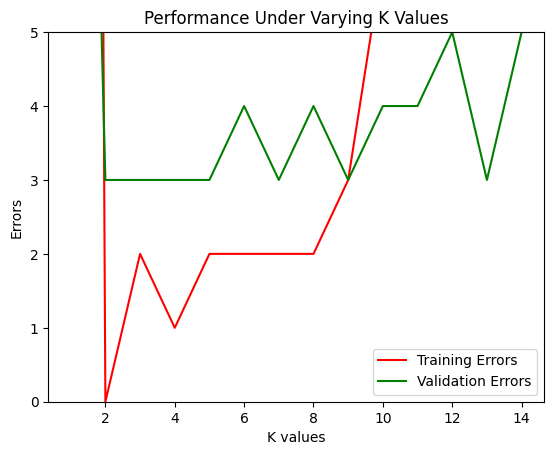

In [121]:
import matplotlib.pyplot as plt

k_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(k_values,train_errors, color='red',label='Training Errors')
plt.plot(k_values,valid_errors, color='green',label='Validation Errors')

plt.ylim(0, 5)

plt.xlabel('K values')
plt.ylabel('Errors')
plt.legend()
plt.title('Performance Under Varying K Values')  

### WE CAN SEE THAT K = 7 GIVES LOW ERROR FOR ALL 3 SETS, SO I CHOOSE K = 7

## c)

In [122]:
def compute_accuracy(y_test, y_pred):
    n = len(y_test)
    correct = 0
    
    for i in range(n):
        if(y_test[i] == y_pred[i]):
            correct += 1
            
    return (correct / n) * 100
    

In [123]:
k = [2,3 ,4,5,7,9,13] # values of k at which the validation error was least

In [125]:
accuracy = 0
final_k = 2
for k_ in k:
    prediction = predict(x_test, x_train, y_train, k_, pairwise_3)
    acc = compute_accuracy(y_test, prediction)
    if (acc > accuracy):
        accuracy = acc
        final_k = k_
        
print(f"The accuracy of this KNN algorithm is: {accuracy} on k = {final_k}.")

The accuracy of this KNN algorithm is: 96.55172413793103 on k = 2.
